<h1> Machine Learning Portfolio </h1>
</br>
<p>Dieser Datensatz enthält alle aktuellen und aktiven Geschäftslizenzen, die von der Abteilung für Unternehmensangelegenheiten und Verbraucherschutz ausgestellt wurden, darin befinden sich Lizenzen aus den USA und Kanada.[1]

Einzelene Spalten wurden vom Herausgeber wie folgt beschrieben:
</p>
</br>
</br>
1. APPLICATION TYPE (Antragsart): 
<li>"ISSUE" ist der Eintrag, der mit dem ersten Lizenzantrag verbunden ist. 
<li>"RENEW" ist ein Eintrag für eine spätere Erneuerung. Alle Einträge werden mit einem Datum für den Beginn und das Ende der Gültigkeitsdauer erstellt. 
<li>"C_LOC" ist ein Eintrag über eine Standortverlegung. Dies bedeutet, dass das Unternehmen umgezogen ist. 
<li>"C_CAPA" ist ein Beleg für die Änderung der Kapazität. Nur wenige Lizenztypen können diese Art von Antrag stellen. 
<li>"C_EXPA" gilt nur für Unternehmen, die über eine Schanklizenz verfügen. Dies bedeutet, dass der Standort des Unternehmens erweitert wurde.[2] 
</li>
</br>
</br>
2. LICENSE STATUS (Lizenz Status): 
<li>"AAI" bedeutet, dass die Lizenz erteilt wurde.
<li>"AAC" bedeutet, dass die Lizenz während ihrer Laufzeit gekündigt wurde.
<li>"REV" bedeutet, dass die Lizenz widerrufen wurde.
<li>"REA" bedeutet, dass der Entzug der Lizenz angefochten worden ist.[3] 
</li>
</br>
</br>

<span id="fn1"> 1 [Chicago Data Portal](https://data.cityofchicago.org/Community-Economic-Development/Business-Licenses-Current-Active/uupf-x98q/data) </span> 
    
<span id="fn2"> 2 [Chicago Data Portal](https://data.cityofchicago.org/Community-Economic-Development/Business-Licenses-Current-Active/uupf-x98q/data) </span> 
    
<span id="fn3"> 3 [Chicago Data Portal](https://data.cityofchicago.org/Community-Economic-Development/Business-Licenses-Current-Active/uupf-x98q/data) </span> 

In dieser Arbeit werden die folgende Punkte behandelt:
1. **Data Exploration/Cleaning/Outlier detection**
2. **Data Preparation** Hinweis: bei diesem Datensatz könn(t)en zusammengesetzte, bzw berechnete Werte aussagekräftig sein
3. **Model building** d.h. Auswahl verschiedener Modelle inkl Analyse der Vor- und Nachteile für die gegebenen Daten, bzw Fragestellung
4. **Classification Metrics**
5. **Feature Importance**

<h3> Fragestellung der Analyse </h3>

Der Datensatz soll analysiert werden. Zusätzlich soll erörtert werden, wie man für zukünftige Datensätze des gleichen Typs Vorhersagen machen könnte, welcher Kategorie der Datensatz zugeortnet wird.

Die Kategorien sind aus der letzten Spalte (AF: License Status) ersichtlich.

Die Datenexploration wird zu großen Teilen mithilfe von Pandas durchgeführt. Um Vorhersagen zu treffen werden Machine Learning Modelle mithilfe von Sckit Learn eingesetzt, genauer handelt es sich bei der Vorhersage von Kategorien um Klassifizierungsmodelle.[4]

<span id="fn4"> 4
    [Bruce,Bruce&Gedeck,2021,S.201](https://eds.p.ebscohost.com/eds/detail/detail?vid=3&sid=e4a31c68-c554-44f0-9cf6-7bc73b3294c5%40redis&bdata=Jmxhbmc9ZGUmc2l0ZT1lZHMtbGl2ZQ%3d%3d#AN=2910692&db=nlebk) </span>

<h2> 1. Data Exploration/Cleaning/Outlier detection </h2>

<p> Zu Beginn der Analyse ist es sinnvoll einen Überblick über die Daten zu erhalten, um diese zu verstehen. Dabei sind die Größe des Datensatzes und der Inhalt der einzelnen Spalten relevante Faktoren für die weitere Analyse. Mithilfe der Größe des Datensatzes können wir feststellen welche Modelle für die später angewandte Klassifizierung sinnvoll sind. Die Inhalte der relevanten Spalten sind hilfreich um die Ergebnisse der Analyse nachzuvollziehen. </p>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv("License_Data.csv")
pd.set_option('display.max_columns', None)

c:\users\jaxxi\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
data.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [21]:
data.shape

(85895, 32)

<p> Unser Datensatz hat 85.000 Einträge und 32 Spalten. </p>

<h3> Look at the target variable </h3>

<p> Da die Lizenzkategorie unsere Zielvariable ist, wollen wir uns diese genauer anschauen. Dabei möchten wir sehen, welche Werte sich darin befinden </p>

In [22]:
data['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

<p> Es lässt sich feststellen, das die Kategorie "AAI" am häufigsten vorkommt, welche einer erteilten Lizenz entspricht. "AAC" kommt mit mehr als 20.000 Einträgen weniger an zweiter Stelle. Die Kategorien "REV" und "INQ" kommen mit weniger als 500 Einträgen bishin zu 2 Einträgen sehr selten vor. </p>

<h3> Handelling Null Data </h3>

<p> Bei der Datensäuberung handelt es sich um einen der wichtigsten Schritte innerhalb der Analyse. Wird diese zu wenig oder fehlerhaft durchgeführt, kann es zu einer Verschlechterung der Vorhersagemodellen kommen.

Um den Datensatz zu säubern, ist zu Beginn ein Blick auf die fehlenden Daten ratsam. Damit lässt sich erkennen ob der Datensatz vollständig ist und eventuell Werte ergänzt werden sollten. Mithilfe der folgenden Funktion können die Anteile der Null werte jeder Spalte in Prozent betrachtet werden. </p>

In [23]:
data.isna().sum()/len(data)*100

ID                                    0.000000
LICENSE ID                            0.000000
ACCOUNT NUMBER                        0.000000
SITE NUMBER                           0.000000
LEGAL NAME                            0.000000
DOING BUSINESS AS NAME                0.001164
ADDRESS                               0.000000
CITY                                  0.000000
STATE                                 0.000000
ZIP CODE                              0.036091
WARD                                 57.862507
PRECINCT                             66.011991
WARD PRECINCT                        57.861342
POLICE DISTRICT                      62.881425
LICENSE CODE                          0.000000
LICENSE DESCRIPTION                   0.000000
LICENSE NUMBER                        0.001164
APPLICATION TYPE                      0.000000
APPLICATION CREATED DATE             75.277956
APPLICATION REQUIREMENTS COMPLETE     0.249141
PAYMENT DATE                          1.500669
CONDITIONAL A

<p> Unser Datensatz hat 10 Spalten, welche einen hohen Anteil an Null Werten aufweisen (über 50 %). Die anderen Spalten haben dafür sehr geringe bis keine fehlenden Werte. Da eine hohe Anzahl an Null Werten die Performance der Analyse negativ beeinflussen kann, sollte im nächsten Schritt entschieden werden wie diese Werte verringert werden. Ein Ansatz wäre, die Spalten mit hohen Anteilen aus den Daten zu Löschen, eine weitere Methode wäre, die Null Werte gegen sinnvolle Werte zu ersetzten.

Da wir bereits viele Spalten haben, können die Spalten mit Null-Anteilen von über 60 % gelöscht werden. Das bedeutet, dass 5 Spalten aus dem Datensatz geworfen werden. Die restlichen Spalten mit einem hohen Anteil an fehlenden Werten sollten sich genauer angeschaut werden. </p>

In [24]:
#drops Colums with too many null values
data = data.drop(columns=data.columns[((data.isna().sum()/len(data)) > 0.60)])
data.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'WARD PRECINCT', 'LICENSE CODE', 'LICENSE DESCRIPTION',
       'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'LICENSE STATUS'],
      dtype='object')

<p> Folgende Spalten werden genauer betrachtet, um die Null Werte zu minimieren:
    <li>WARD
    <li>WARD PRECINCT
    <li>LATITUDE
    <li>LONGITUDE
    <li>LOCATION
        
Es handelt sich bei allen Spalten um geographische Daten, um diese sinnvoll zu ergänzen können zusätzliche Datenquellen verwendet werden. Für die Spalten der Längen- und Breitengrade könnten APIs eingesetzt werden um mithilfe der Spalte "ADDRESS" die fehlenden Werte zu ersetzten. Das gleiche Vorgehen kann bei den Bezirken angewandt werden.
</p>

<h3> Drop unuseful columns </h3>

<p>Ein weiterer Punkt, welcher bei der Datensäuberung wichtig ist, ist das Löschen unwichtiger Spalten. Damit sind Spalten gemeint, welche für die Analyse unbedeutend sind. Folglich kann die Größe des Datensatzes angepasst werden, um den wichtigen Spalten mehr Bedeutung zu schenken.
</p>

<p> Wir haben uns entschlossen die Spalten "ADDRESS", sowie "LOCATION" zu entfernen. Die Adresse spielt für die Analyse keine Rolle, da breits genug geographische Daten wie die Koordinaten, die Stadt, der Bundesstaat und der ZIP Code vorhanden sind. Zudem sind die Einträge unterschiedlich formatiert, was die Analyse negativ beeinflussen könnte. </p>

In [25]:
data = data.drop(["ADDRESS"], axis = 1)
#we already have coordinates aswell as city, state, zip code and so on.. no need to have the adress
#plus this column is very bad formated

<p> Aus dem selben Grund aus dem wir die Adresse entfernt haben, wird auch die Spalte "LOCATION" entfernt. Die Längen- und Breitengrade sind bereits in einzelne Spalten aufgeteilt und werden somit nicht in einer zusätzlichen Spalte in welche die Koordinaten in einem Dictionary auflistet, benötigt. </p>

In [26]:
data = data.drop(["LOCATION"], axis = 1)
#we have latetude and longetude in separted columns- don't need a dictonary

<h2> Vizualization </h2>

Zusätzlich ist neben der Datensäuberung auch eine Visualisierung der Daten hilfreich, um wertvolle Erkenntnise über die Daten zu schließen.[5] </br>
Deshalb ist es wichtig in jeder Analyse Darstellungen zu erstellen, welche zur anfänglichen Fragestellung beitragen können.

<span id="fn5"> 5 [Bruce,Bruce&Gedeck,2021,S.47](https://eds.p.ebscohost.com/eds/detail/detail?vid=3&sid=e4a31c68-c554-44f0-9cf6-7bc73b3294c5%40redis&bdata=Jmxhbmc9ZGUmc2l0ZT1lZHMtbGl2ZQ%3d%3d#AN=2910692&db=nlebk) </span> 

<p> Da wir genügend geographische Daten zur Verfügung haben, ist eine Darstellung mithilfe einer Map möglich. So können wir sehen an welchen Orten, welche Lizenz vorliegt. Das hilft dabei zu erkennen ob eine bestimmte Kategorie an einem Ort vermehrt vorkommt als an anderen Orten. </p>

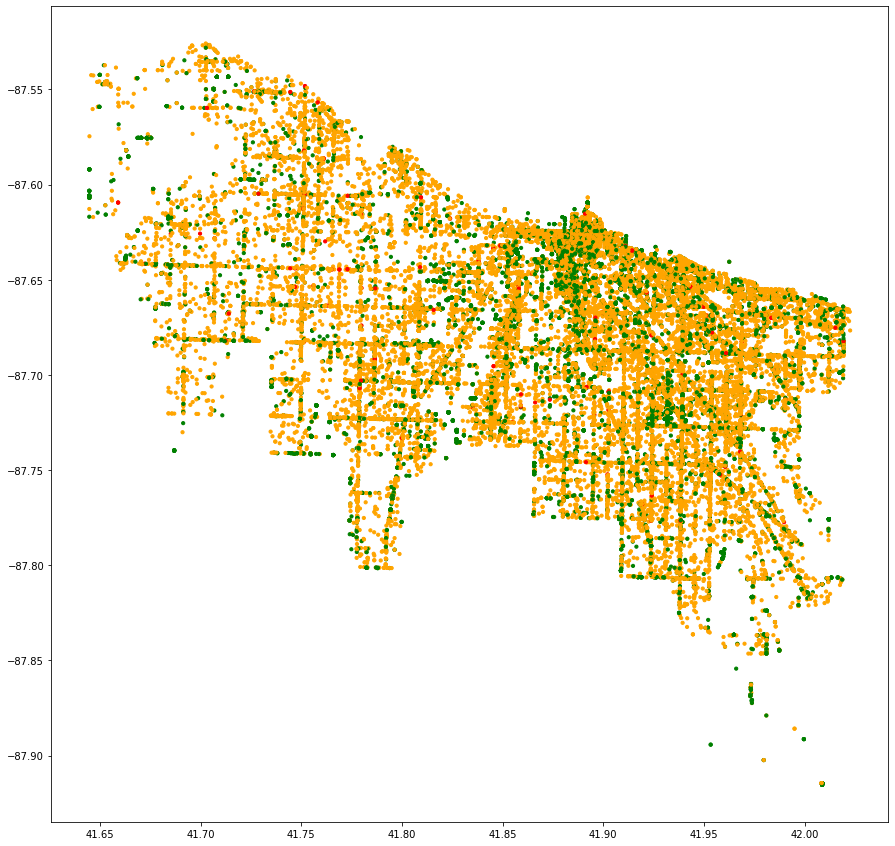

In [27]:
fig, ax = plt.subplots(figsize=(15,15))

colors = {'AAI':'green', 'AAC':'orange', 'REV':'red', 'REA':'yellow', 'INQ': 'grey'}

ax.scatter(data['LATITUDE'], data['LONGITUDE'],s=10, c=data['LICENSE STATUS'].map(colors))

plt.show()


![USA MAP](usa_map.png)

<p> Um die Visualisierung anschaulicher zu gestalten, wäre es zudem sinnvoll eine Landkarte als Hintergrund zu legen. Wir können anhand des Scatterplots bereits erkennen, dass die Kategorien größtenteils ausgeglichen verteilt sind. Im Nord-Osten lässt sich aber eine höhere Anzahl der Lizenz "AAI" erkennen, als in den anderen Regionen. Wichtig anzumerken ist aber, dass die Koordinaten einige Null Werte aufweisen und eine korrekte Annahme erst mit vollständigen Daten getroffen werden kann. </p>

<h2> 2. Data Preperation </h2>


## Index

Nachdem wir bereits einige Spalten entfernt haben, ändern wir nun den Index unseres Datensatzes. Statt der bisher einfachen Nummerierung der Spalten, verwenden wir nun die Spalte „ID“ als Index. Dies wäre nicht zwangsweise notwendig, sorgt jedoch für eine einfachere Zuordnung bzw. Übersicht. Zusätzlich entfernen wir die Spalten license id, acount number, legal name und doing business as name, da diese keine Informationen zur Klassifikation enthalten, sondern lediglich organisatorische Daten enthalten. Über die eindeutige ID können diese jederzeit wieder aufgerufen werden.

In [28]:
data = data.set_index("ID")
data = data.drop(["LICENSE ID", "ACCOUNT NUMBER", "LEGAL NAME", "DOING BUSINESS AS NAME", "ZIP CODE"], axis=1)

# Zielvariable
y = data["LICENSE STATUS"]
# Features
X = data.drop(["LICENSE STATUS"], axis=1)

## Label Encoder

Da der Datensatz viele nicht numerische Spalten enthält, viele Klassifikations-Algorithmen jedoch nur mit numerischen Werten arbeiten können und selbst nicht in der Lage sind, strings in integer/floats umzuwandeln, müssen wir als Vorbereitung diese Spalten in numerische Werte umwandeln. Umgesetzt haben wir dies mit der Preprocessing Funktion „LabelEncoder“ von sklearn. Dieser wandelt Text-Spalten in numerische Werte um, indem er ihnen Werte zwischen 0 und Klassenzahl - 1 zuweist.
 
Vorteil dieses Verfahren ist, dass es einfach und schnell umgesetzt ist und den Datensatz nicht vergrößert.
Nachteil ist jedoch, dass einige Algorithmen diese numerischen Werte als hierarchisch interpretieren. Dies wäre jedoch nicht richtig, da die Zahlen lediglich kategorische Werte darstellen.

Eine andere Möglichkeit mit diesen Werten umzugehen wäre, einen One-Hot Encoder zu verwenden, der für jeden Wert einer Kategorie eine zusätzliche Spalte erstellt, und dann immer einzeln mit 1 oder 0 bewertet, ob beispielsweise das Unternehmen dieser Kategorie zugehörig ist oder nicht.
Vorteil dieses Verfahrens ist, dass ein Algorithmus hierin keine Hierarchie interpretieren wird.
Allerdings vergrößert das den Datensatz um viele zusätzliche Spalten. Gerade in unserem Anwendungsfall, da wir einige Spalten mit Text haben und diese teilweise auch mehrere unterschiedliche Werte haben können. Dies würde viele zusätzliche Spalten und eine erhöhte Rechenzeit zur Folge haben.[6]

<span id="fn6"> 6 [Towards Data Science, 2019](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd) </span> 

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = X.apply(le.fit_transform)

## Feature Scaling

Für einige Algorithmen ist es notwendig, dass die Input-Werte keine zu unterschiedlichen Skalierung aufweisen. Eine Variante, dies zu vermeiden, ist die Standardisierung. Bei dieser wird zuerst der Mittelwert entfernt und dann auf eine einheitliche Abweichung skaliert. Die Werte haben also immer einen Mittelwert von 0. Vorteil dieses Verfahrens ist, dass es von Ausreißer-Werten kaum beeinflusst wird.

Eine andere Variante des Feature Scalings wäre die Normalisierung. Hierbei werden alle Werte in einen vorgegebenen Bereich von 0 und 1 skaliert. Einige Algorithmen arbeiten nur mit Werten, die sich in diesem festgelegten Bereich befinden. Nachteil ist jedoch, dass es wesentlich stärker von Ausreißern beeinflusst wird. Ein besonders hoher Wert würde beispielsweise dazu führen, dass alle anderen Werte in einem sehr kleinen Bereich nahe 0 liegen würden.[7]

<span id="fn7"> 7 [Geron,2019,S.72-73](https://eds.s.ebscohost.com/eds/detail/detail?vid=1&sid=3d78d21a-1ef6-4c97-98c4-bc8a3b4df3cf%40redis&bdata=Jmxhbmc9ZGUmc2l0ZT1lZHMtbGl2ZQ%3d%3d#AN=bdl.1039858198&db=cat07675a) </span> 

In [30]:
from sklearn.preprocessing import StandardScaler

fs = StandardScaler()
X = pd.DataFrame(fs.fit_transform(X), columns=X.columns)

## Trainings- und Testdaten

Bevor man beginnt ein Algorithmus zu trainieren, sollte man seinen Datensatz noch in Trainings- und Testdaten aufteilen. Wichtig ist dabei, dass die Aufteilung zufällig und nicht nach einem bestimmten Muster erfolgt. Mit den Trainingsdaten kann man dann das Klassifikations-Modell trainieren. Während des gesamten Trainings- und Optimierungsprozesses werden die übrigen Testdaten nicht verwendet. Erst zum Schluss setzt man die Testdaten ein, um das fertige Modell zu überprüfen. Somit ist es möglich einen Test mit Daten durchzuführen, welche das Modell zuvor noch nie als Input hatte und sich nicht explizit auf diese trainieren konnte. Dies hat ein wesentlich realitätsnäheres Ergebnis zur Folge.[8]

Aufgeteilt haben wir unsere Daten mit Hilfe des train_test_split von sklearn, wobei wir 20% der Daten als Testdaten verwendet haben.

<span id="fn8"> 8 [Geron,2019,S.54-56](https://eds.s.ebscohost.com/eds/detail/detail?vid=1&sid=3d78d21a-1ef6-4c97-98c4-bc8a3b4df3cf%40redis&bdata=Jmxhbmc9ZGUmc2l0ZT1lZHMtbGl2ZQ%3d%3d#AN=bdl.1039858198&db=cat07675a) </span> 

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h2> 3. Model building </h2>

## Entscheidungsbäume

Entscheidungsbäume können sowohl zur Klassifikation als auch zu Regression genutzt werden da es sich um ein hierarchisches Klassifikationsmodell handelt. Die Baumstrukturen sollen mit Hilfe von Algorithmen automatisch aus den Daten erstellt werden und dazu dient der ID3-Algorithmus. Hierbei handelt es sich um einen iterativen und rekursiven Algorithmus. Zu Beginn geht es darum das Attribut des Datensatzes auszuwählen, welches die Daten am besten klassifiziert, um den höchsten Informationsgewinn zu erhalten. Danach wird ein Knotenpunkt mit dem ausgewählten Attribut gebildet. Sind die Ergebnisse eindeutig werden diese gespeichert und es muss ein anderes Attribut gewählt werden. Im Anschluss daran, wird der Prozess rekursiv fortgeführt, das heißt, dass die Daten kleinere Untermengen zerlegt werden. 
Damit diese Schritte durchgeführt werden können, müssen die Daten bereinigt werden und das wiederum geschieht durch Zerlegung der Daten. Die Zerlegung erfolgt über den Informationsgewinn, welcher anhand der Entropie (Maß für Unreinheit) berechnet wird. Die Klassen sind umso besser zu unterscheiden, je reiner die Daten sind. 

![Entropie](Formel1_DT.jpg)

Eine weitere Möglichkeit, welche wir bei der Implementierung auch genutzt haben, ist der Gini-Koeffizient. Er funktioniert ähnlich wie die Entropie hat allerdings ein durchaus flacheres degressives Wachstum, außerdem reagiert er unempfindlicher gegenüber Änderungen in den Klassenhäufigkeiten. 

![Gini](Formel2_DT.jpg)

Des Weiteren gibt es noch den Klassifikationsfehler, welcher absolut unempfindlich gegenüber Änderungen in der Klassenhäufigkeit ist. Er eignet sich nicht besonders gut für Mehrfachklassifikationen, dafür aber umso besser für das nachträgliche Pruning der Baumzweige. Pruning wird verwendet, um Overfitting zu korrigieren, was typisch für Entscheidungsbäume ist, daher werden oftmals Random Forests genutzt, um dem Abhilfe zu schaffen. Zu Overfitting kommt es, wenn sich die die Bäume zu sehr an die Trainingsdaten anpassen. Die Folge daraus ist, dass sie dann nicht generalisierend genug für neue Daten sind und somit die Fehlerquote nicht mehr angemessen ist.


In [32]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

## Support Vector Machines (Linear Support Vector Classification)

Support Vector Machines sind in der Lage sowohl lineare als auch nichtlineare Klassifikationsaufgaben, Regression und die Erkennung von Ausreißern zu verarbeiten. Bei linearen Klassifikationsaufgaben können mit ihnen zum Beispiel Kategorien voneinander getrennt werden. Man versucht dabei die Kategorien so gut wie möglich voneinander zu separieren und den größtmöglichen Abstand zu den Trainingsdatenpunkten zu finden. Die Datenpunkte, die sich am Rand dieser sogenannten Straße befinden nennt man Stützvektoren. Man unterscheidet hier zwischen Hard-Margin- und Soft-Margin-Klassifikation. Bei Hard-Margin-Klassifikationen befinden sich alle Datenpunkte auf der richtigen Straßenseite und auch abseits der Straße. Bei Soft-Margin-Klassifikationen hingegen sind die Daten nicht linear separierbar und es können Ausreißer vorhanden sein. Es ist trotzdem wichtig eine möglichst breite Straße zu finden und dabei so wenige Margin-Verletzungen wie möglich zu haben. Margin-Verletzungen sind Datenpunkte, die auf der falschen Straßenseite oder auf der Straße liegen.
Sind die Datenpunkte nicht linear separierbar können polynomielle Merkmale die Lösung sein. Hat ein Datensatz zum Beispiel nur ein Merkmal ![x1](x1.jpg) kann ein weiteres Merkmal ![x2](x2.jpg) hinzugefügt werden. Daraus entsteht ein Datensatz, den man linear separieren kann.
Für komplexe Datensätze mit mehreren polynomiellen Merkmalen empfiehlt sich polynomielle Kernel, der sogenannte Kerneltrick. Allerdings werden hier keine polynomiellen Merkmale hinzugefügt wie bei der nichtlinearen Klassifikation, sondern ein polynomieller Kernel x. Grades. Dieser muss natürlich an den Datensatz angepasst werden, was auch davon abhängig ist, ob der Klassifikator zu Overfitting oder Underfitting neigt. Die richtigen Werte zu finden ist nich immer leicht, hier kann die Gittersuche Abhilfe schaffen.
Eine andere Methode, die bei nichtlinearen Klassifikationsaufgaben angewandt werden kann, die Ähnlichkeitsfunktion, mit der Merkmale hinzugefügt werden können. Sie misst die Ähnlichkeit zwischen einem Datenpunkt und einem gewählten Orientierungspunkt und kann damit neue Merkmale berechnen, um den Datensatz linear separierbar zu machen.
Für Regressionsaufgaben versucht man nicht wie bei der linearen Klassifikation die Datenpunkte zu separieren. Das Ziel hierbei ist es so viele Datenpunkte wie möglich auf der Straße zu platzieren da man sie nicht in Kategorien einteilen möchte, sondern zur Vorhersage nutzt.


In [33]:
from sklearn.svm import LinearSVC

svc = LinearSVC() # eigentlich notwendig, max_iter zu erhöhen, dies erhöht jedoch auch die Laufzeit sehr stark
svc.fit(X_train, y_train)

c:\users\jaxxi\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

## K-Nearest-Neighbours

Der K-Nearest-Neighbours-Algorithmus ist ein einfacher Algorithmus zu Klassifikation von Daten punkten. Im Gegensatz zu anderen Methoden zu Klassifikation, benötigt dieser Algorithmus kein aufwändiges Training, stattdessen werden Daten bei jeder Klassifizierung verwendet.
Das Ziel des Algorithmus ist es, auf Basis der nächstgelegenen Nachbarn des zu klassifizierenden Datenpunktes herauszufinden zu welcher Klasse er gehört.
Die Anzahl der Dimensionen n ergibt sich aus den verwendeten Parametern (z.B. Länge und Zeit --> n=2) des Eingabevektors x.
K steht für die Anzahl der zu berücksichtigten Datenpunkte, die für die Klassifizierung von x verwendet werden. Bei k=1 entspricht das einem Nachbarn, bei k=3 entspricht das drei Nachbarn.
Bei der Auswahl der Größe von k ist zu beachten, dass der Wert weder zu groß noch zu klein ist. Wird für k ein zu kleiner Wert gewählt, könnten Ausreißer zu stark ins Gewicht fallen, was wiederum dafür sorgt, dass das Ergebnis verfälscht werden könnte. Daher sollte ein Wert von eins vermieden werden. Ebenso verhält es sich, wenn der Wert für k zu groß ist. Hat man zum Beispiel 20 Datenpunkte von denen 11 einen negativen Wert und 9 einen positiven Wert haben und k=20 ist, wird immer ein negatives Ergebnis die Folge sein. 
Nach der Auswahl der Parameter folgt die Berechnung des Euklidischen Abstandes mit der Formel 

![Formel KNN](Formel_KNN.jpg)

Die Datenpunkte mit dem geringsten Abstand entscheiden schlussendlich darüber welcher Kategorie der neue datenpunkt zugeordnet werden soll.


In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Evaluation der Klassifikations-Methoden

Zur Evaluation der drei angewandten Methoden haben wir uns vor allem die erzielten Scores miteinander verglichen.

- Entscheidungsbaum:		    0,884

- Support Vector Machines:	0.803

- K-Nearest-Neighbours:	    0,8915

Der Entscheidungsbaum hat mit 0,884 den zweithöchsten Score. Des Weiteren ist der Entscheidungsbaum einfach zu implementieren und es wird auch kein Feature Scaling angewandt, was uns einen Arbeitsschritt erspart.

Nachteilig bei dieser Methode ist die Tatsache, dass Entscheidungsbäume schnell zu Over- oder Underfitting neigen. Mann muss sich also genau Überlegen welche Werte man als Parameter verwendet, um Over- und Underfitting zu vermeiden. Das ist Zeitintensiv da man es mit einigen Werten versuchen muss, bis man letzendlich eine passende Kombination gefunden hat.

Mit der Linearen Support Vector Classification (SVM) wir einen Score von 0,803 was in unserer Versuchsreihe der schlechteste Wert ist.  Die Herausforderung hierbei ist es herauszufinden, ob man mit Hard-Margin oder Soft-Margin arbeitet und anschließend die breiteste „Straße“ zu finden mit möglichst keinen Margin-Verletzungen. Bei der linearen Klassifikation ist dies in der Regel noch gut umsetzbar.

Mit dem KNN-Algorithmus haben wir den höchsten Score mit einem Wert von 0,8915 erzielt. Zusätzlich ist die Implementierung sehr einfach und es muss nur darauf geachtet werden nicht zu viele und auch nicht zu wenige Datenpunkte als nächste Nachbarn zu nutzen um ein brauchbares Ergebnis zu erzielen.

Nachteilig an dieser Methode ist es, dass bei einer zu hohen Menge an Datenpunkten das Ergebnis verfälscht werden kann, wie auch bei einer zu geringen Menge. Bei großen Datensätzen ist es schwer abzuwägen, ab wann die Menge zu hoch oder zu niedrig gesetzt ist.


<h2> 4. Classification Metrics </h2>

## Cross Validation

Cross Validation ist eine Methode zur Vorhersagebewertung, bei der lediglich die Trainingsdaten verwendet werden. Das heißt, die Testdaten werden weiterhin nicht beachtet und können allein für den Test des schlussendlichen Modells verwendet werden. Cross Validation funktioniert, indem aus dem Trainingsset verschiedene Subsets gebildet werden. Mit einem Teil dieser Subsets wird das Modell trainiert und dann auf die übrigen Trainingsdaten angewandt. Dies wird dann mehrmals durchgeführt, wobei die verschiedenen Subsets wechseln. Das durchschnittliche Ergebnisse der verschiedenen Durchgänge bildet dann den Cross-Validation-Score. (Ein perfektes Modell hätten einen Score von 1).[9]

<span id="fn9"> 9 [Geron,2019,S.91-92](https://eds.s.ebscohost.com/eds/detail/detail?vid=1&sid=3d78d21a-1ef6-4c97-98c4-bc8a3b4df3cf%40redis&bdata=Jmxhbmc9ZGUmc2l0ZT1lZHMtbGl2ZQ%3d%3d#AN=bdl.1039858198&db=cat07675a) </span> 

In [35]:
from sklearn.model_selection import cross_val_score

tree_score = cross_val_score(tree, X_train, y_train).mean().round(4)
svc_score = cross_val_score(svc, X_train, y_train).mean().round(4)
knn_score = cross_val_score(knn, X_train, y_train).mean().round(4)

print("Cross Validation Scores:")
print(f"\nDecision Tree Classifier: {tree_score}")
print(f"Linear SVC: {svc_score}")
print(f"KNeighborsClassifier {knn_score}")

# Achtung: hohe Laufzeit! (aufgrund Linear SVC)

c:\users\jaxxi\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\users\jaxxi\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\users\jaxxi\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\jaxxi\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\jaxxi\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, inc

Cross Validation Scores:

Decision Tree Classifier: 0.8832
Linear SVC: 0.8021
KNeighborsClassifier 0.8902


<h2> 5. Feature Importance </h2>

Für die Klassifikation sind nicht alle Features gleich relevant. Auch sind je nach verwendetem Algorithmus unterschiedliche Features relevanter. Mit Hilfe der permutation_importance Funktion kann man aus einem Modell die Relevanz der verschiedenen Features ausgegeben werden. Dank dieser Informationen kann abgeschätzt werden, welche Daten weiter gesammelt und verwendet werden sollten und welche man eventuell eher vernachlässigen kann, um damit den Aufwand und die Rechenzeit zu verringern.

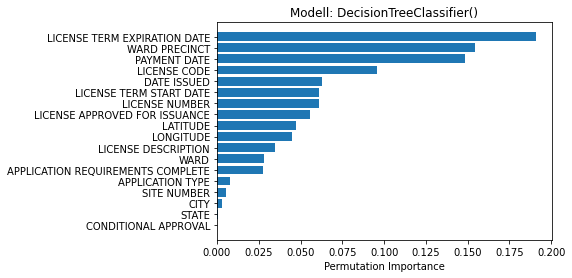

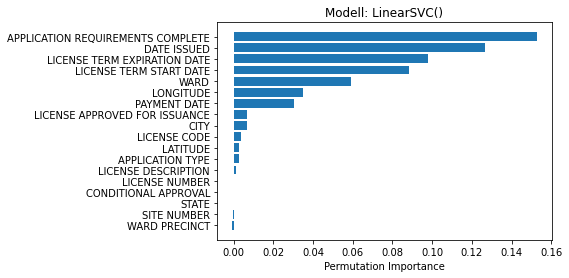

In [36]:
from sklearn.inspection import permutation_importance

def feature_importance(model, x, y):
    perm_importance = permutation_importance(model, x, y)

    feature_names = x.columns
    features = np.array(feature_names)

    sorted_idx = perm_importance.importances_mean.argsort()
    plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
    plt.title(f"Modell: {model}")
    plt.xlabel("Permutation Importance")
    plt.show()
    
    
feature_importance(tree, X_test, y_test)
feature_importance(svc, X_test, y_test)

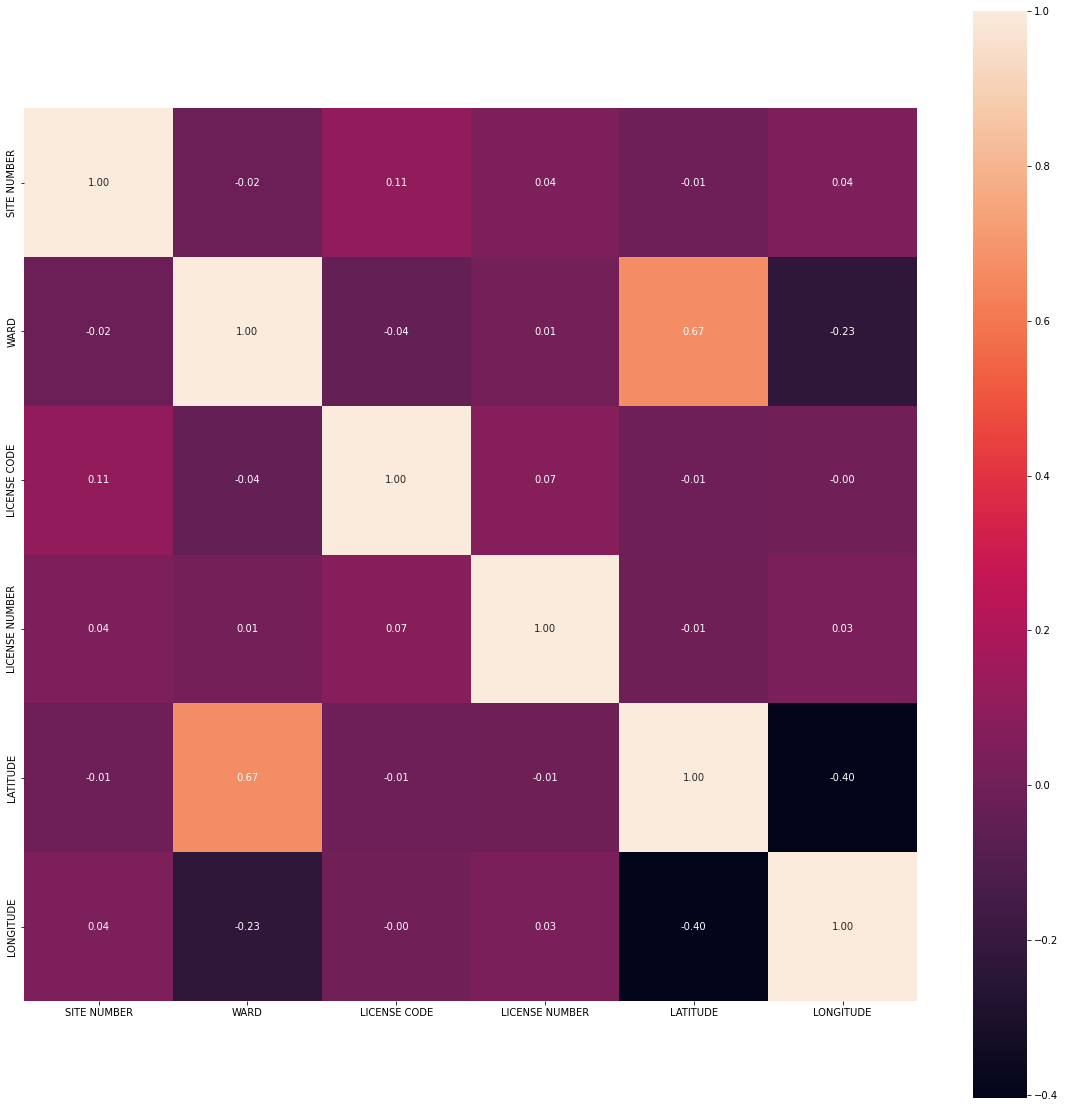

In [37]:
#creates a Correlation Matrix
def correlation_matrix(df):
    corr = df.corr()
    f, ax = plt.subplots(figsize=(20, 20))
    sns.heatmap(corr, square = True,fmt='.2f' ,annot = True)
    
correlation_matrix(data)    

In [38]:
data.shape

(85895, 19)

In [39]:
data

,SITE NUMBER,CITY,STATE,WARD,WARD PRECINCT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LATITUDE,LONGITUDE,LICENSE STATUS
ID,,,,,,,,,,,,,,,,,,,
35342-20020816,1,CHICAGO,IL,22.0,22-28,1010,Limited Business License,35342.0,RENEW,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,41.843613,-87.714618,AAI
1358463-20051116,29,CHICAGO,IL,33.0,33-23,1315,Mobile Food Dispenser,1358463.0,RENEW,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,41.961132,-87.699626,AAC
1980233-20090722,1,HIGHLAND,IL,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,AAI
1476582-20040211,1,LEMONT,IL,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,AAI
1141408-20080516,1,WAUKEGAN,IL,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,AAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12652-20120516,1,CHICAGO,IL,11.0,11-28,1008,Hazardous Materials,12652.0,RENEW,2012-03-15T00:00:00,2012-05-07T00:00:00,N,2012-05-16T00:00:00,2014-05-15T00:00:00,2012-05-07T00:00:00,2012-05-08T00:00:00,41.863501,-87.642210,AAC
1821421-20070522,1,MACHESNEY PARK,IL,NaN,NaN,1800,Board-Up Work,1821421.0,ISSUE,2007-05-22T00:00:00,2007-05-22T00:00:00,N,2007-05-22T00:00:00,2009-06-15T00:00:00,2007-05-22T00:00:00,2007-05-22T00:00:00,NaN,NaN,AAI
74137-20090116,2,DOWNERS GROVE,IL,NaN,NaN,1010,Limited Business License,74137.0,RENEW,2008-11-14T00:00:00,2009-01-09T00:00:00,N,2009-01-16T00:00:00,2011-01-15T00:00:00,2009-01-09T00:00:00,2009-12-08T00:00:00,NaN,NaN,AAI


<h3> Make a Map </h3>

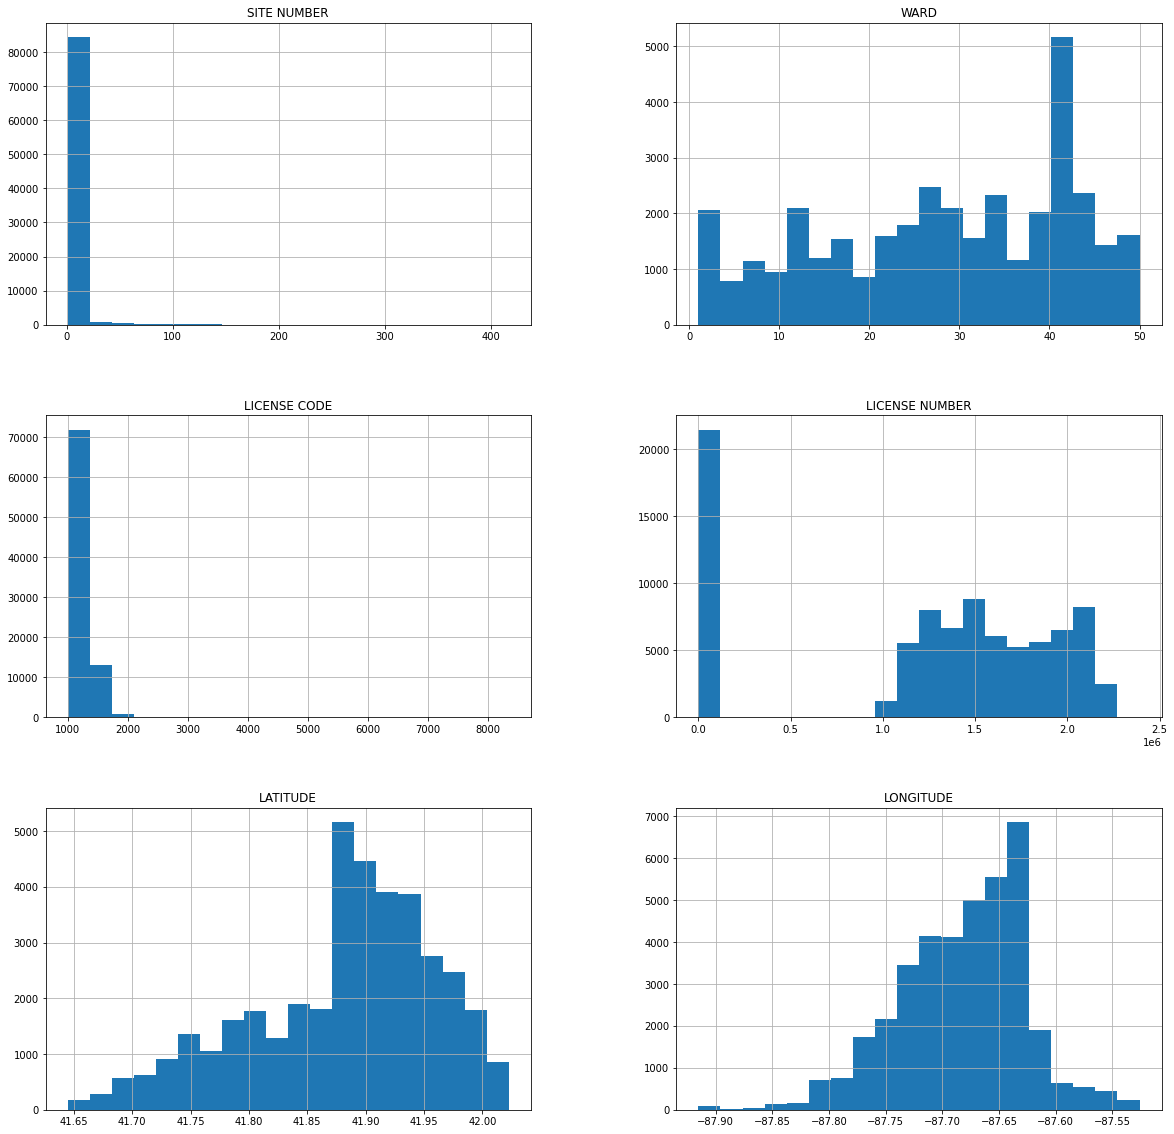

In [40]:
#Makes a Histogram
def pd_hist(df,bins,attribute=False):
    if bool(attribute) == True:
        test_df = df[attribute]
        hist = test_df.hist(bins=bins,figsize=(20,20))
    else:
        hist = df.hist(bins=bins,figsize=(20,20))
        
pd_hist(data, 20)